In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('credit_risk_dataset.csv')
data.head()
data.shape

(32581, 12)

In [3]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
x=data.drop('loan_status', axis=1)
y=data['loan_status']

In [5]:
x

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [6]:
x.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
x_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2162,24,30000,MORTGAGE,4.0,PERSONAL,B,5000,10.71,0.17,N,2
7670,24,54000,OWN,8.0,EDUCATION,C,1200,13.11,0.02,Y,3
24007,27,29000,RENT,2.0,PERSONAL,B,10000,12.69,0.34,N,10
25230,29,75840,OWN,5.0,HOMEIMPROVEMENT,G,25000,21.27,0.33,N,6
4897,22,39000,RENT,4.0,MEDICAL,A,5000,6.99,0.13,N,2
...,...,...,...,...,...,...,...,...,...,...,...
13123,24,88494,OWN,8.0,MEDICAL,B,24000,NaN,0.27,N,2
19648,32,35000,MORTGAGE,11.0,DEBTCONSOLIDATION,C,4000,13.61,0.11,Y,5
9845,22,38500,RENT,1.0,MEDICAL,B,9000,10.83,0.23,N,2
10799,23,42000,RENT,4.0,VENTURE,C,10000,NaN,0.24,N,2


In [9]:
x_train.person_emp_length.describe()

count    25362.000000
mean         4.808690
std          4.173959
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [10]:
x_train=x_train.loc[(data['person_emp_length']<46) | (data['person_emp_length'].isnull()), :]

In [11]:
x_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2162,24,30000,MORTGAGE,4.0,PERSONAL,B,5000,10.71,0.17,N,2
7670,24,54000,OWN,8.0,EDUCATION,C,1200,13.11,0.02,Y,3
24007,27,29000,RENT,2.0,PERSONAL,B,10000,12.69,0.34,N,10
25230,29,75840,OWN,5.0,HOMEIMPROVEMENT,G,25000,21.27,0.33,N,6
4897,22,39000,RENT,4.0,MEDICAL,A,5000,6.99,0.13,N,2


In [12]:
x_train['person_emp_length'].fillna(x_train['person_emp_length'].median(), inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [13]:
x_test['person_emp_length'].fillna(x_test['person_emp_length'].median(), inplace=True)

In [14]:
x_train.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2530
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [15]:
x_test.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length               0
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 586
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

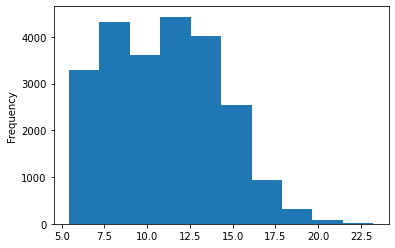

In [16]:
x_train.loan_int_rate.plot(kind='hist')

In [17]:
x_train.loan_int_rate.median()

10.99

In [18]:
x_train['loan_int_rate'].fillna(x_train['loan_int_rate'].median(), inplace=True)

In [19]:
x_test['loan_int_rate'].fillna(x_test['loan_int_rate'].median(), inplace=True)

In [20]:
x_test.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [21]:
x_train.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [22]:
cat=[column for column in x.columns if x[column].dtype=='O']
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [23]:
x_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2162,24,30000,MORTGAGE,4.0,PERSONAL,B,5000,10.71,0.17,N,2
7670,24,54000,OWN,8.0,EDUCATION,C,1200,13.11,0.02,Y,3
24007,27,29000,RENT,2.0,PERSONAL,B,10000,12.69,0.34,N,10
25230,29,75840,OWN,5.0,HOMEIMPROVEMENT,G,25000,21.27,0.33,N,6
4897,22,39000,RENT,4.0,MEDICAL,A,5000,6.99,0.13,N,2


In [24]:
x_train.loan_grade.unique()

array(['B', 'C', 'G', 'A', 'D', 'F', 'E'], dtype=object)

In [25]:
loan_g={'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1}

In [26]:
x_train['loan_grade']=x_train['loan_grade'].map(loan_g)

<ipython-input-26-67fc27d8b607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['loan_grade']=x_train['loan_grade'].map(loan_g)


In [27]:
x_test['loan_grade']=x_test['loan_grade'].map(loan_g)

<ipython-input-27-6b4b4345bf8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['loan_grade']=x_test['loan_grade'].map(loan_g)


In [28]:
x_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2162,24,30000,MORTGAGE,4.0,PERSONAL,6,5000,10.71,0.17,N,2
7670,24,54000,OWN,8.0,EDUCATION,5,1200,13.11,0.02,Y,3
24007,27,29000,RENT,2.0,PERSONAL,6,10000,12.69,0.34,N,10
25230,29,75840,OWN,5.0,HOMEIMPROVEMENT,1,25000,21.27,0.33,N,6
4897,22,39000,RENT,4.0,MEDICAL,7,5000,6.99,0.13,N,2


In [29]:
x_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2124,24,41300,RENT,2.0,EDUCATION,5,2400,12.68,0.06,N,2
252,24,85000,RENT,5.0,MEDICAL,6,25000,10.62,0.29,N,4
13083,24,88000,MORTGAGE,4.0,MEDICAL,6,6000,9.91,0.07,N,2
12447,23,81120,MORTGAGE,3.0,PERSONAL,6,15000,10.25,0.18,N,4
31009,39,73000,MORTGAGE,3.0,VENTURE,7,10000,7.51,0.14,N,14


In [30]:
x_train.person_home_ownership.unique()

array(['MORTGAGE', 'OWN', 'RENT', 'OTHER'], dtype=object)

In [31]:
home_own=pd.get_dummies(x_train['person_home_ownership'], drop_first=True)
home_own.head()

,OTHER,OWN,RENT
2162,0,0,0
7670,0,1,0
24007,0,0,1
25230,0,1,0
4897,0,0,1


In [32]:
x_train=pd.concat([x_train,home_own], axis=1)
x_train.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,OWN,RENT
2162,24,30000,MORTGAGE,4.0,PERSONAL,6,5000,10.71,0.17,N,2,0,0,0
7670,24,54000,OWN,8.0,EDUCATION,5,1200,13.11,0.02,Y,3,0,1,0
24007,27,29000,RENT,2.0,PERSONAL,6,10000,12.69,0.34,N,10,0,0,1
25230,29,75840,OWN,5.0,HOMEIMPROVEMENT,1,25000,21.27,0.33,N,6,0,1,0
4897,22,39000,RENT,4.0,MEDICAL,7,5000,6.99,0.13,N,2,0,0,1


In [33]:
x_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2124,24,41300,RENT,2.0,EDUCATION,5,2400,12.68,0.06,N,2
252,24,85000,RENT,5.0,MEDICAL,6,25000,10.62,0.29,N,4
13083,24,88000,MORTGAGE,4.0,MEDICAL,6,6000,9.91,0.07,N,2
12447,23,81120,MORTGAGE,3.0,PERSONAL,6,15000,10.25,0.18,N,4
31009,39,73000,MORTGAGE,3.0,VENTURE,7,10000,7.51,0.14,N,14


In [34]:
x_test.person_home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [35]:
home_own_test=pd.get_dummies(x_test['person_home_ownership'], drop_first=True)
home_own_test.head()

,OTHER,OWN,RENT
2124,0,0,1
252,0,0,1
13083,0,0,0
12447,0,0,0
31009,0,0,0


In [36]:
x_test=pd.concat([x_test,home_own_test],axis=1)
x_test.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,OWN,RENT
2124,24,41300,RENT,2.0,EDUCATION,5,2400,12.68,0.06,N,2,0,0,1
252,24,85000,RENT,5.0,MEDICAL,6,25000,10.62,0.29,N,4,0,0,1
13083,24,88000,MORTGAGE,4.0,MEDICAL,6,6000,9.91,0.07,N,2,0,0,0
12447,23,81120,MORTGAGE,3.0,PERSONAL,6,15000,10.25,0.18,N,4,0,0,0
31009,39,73000,MORTGAGE,3.0,VENTURE,7,10000,7.51,0.14,N,14,0,0,0
21567,29,33864,RENT,2.0,VENTURE,4,6000,14.91,0.18,Y,6,0,0,1
28280,34,35000,RENT,2.0,VENTURE,6,15000,10.99,0.43,N,5,0,0,1
24541,28,54000,RENT,2.0,EDUCATION,4,10000,16.49,0.19,Y,7,0,0,1
16909,23,64000,RENT,0.0,MEDICAL,5,12000,13.16,0.19,Y,4,0,0,1
12778,22,85000,MORTGAGE,6.0,VENTURE,5,10000,13.99,0.12,Y,4,0,0,0


In [37]:
x_train.drop('person_home_ownership', axis=1, inplace=True)


In [38]:
x_test.drop('person_home_ownership', axis=1, inplace=True)


In [39]:
x_test.head()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,OWN,RENT
2124,24,41300,2.0,EDUCATION,5,2400,12.68,0.06,N,2,0,0,1
252,24,85000,5.0,MEDICAL,6,25000,10.62,0.29,N,4,0,0,1
13083,24,88000,4.0,MEDICAL,6,6000,9.91,0.07,N,2,0,0,0
12447,23,81120,3.0,PERSONAL,6,15000,10.25,0.18,N,4,0,0,0
31009,39,73000,3.0,VENTURE,7,10000,7.51,0.14,N,14,0,0,0


In [40]:
x_train.head()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,OWN,RENT
2162,24,30000,4.0,PERSONAL,6,5000,10.71,0.17,N,2,0,0,0
7670,24,54000,8.0,EDUCATION,5,1200,13.11,0.02,Y,3,0,1,0
24007,27,29000,2.0,PERSONAL,6,10000,12.69,0.34,N,10,0,0,1
25230,29,75840,5.0,HOMEIMPROVEMENT,1,25000,21.27,0.33,N,6,0,1,0
4897,22,39000,4.0,MEDICAL,7,5000,6.99,0.13,N,2,0,0,1


In [41]:
person_def_on_file={'N':0,'Y':1}

In [42]:
x_train['person_def_on_file']=x_train['cb_person_default_on_file'].map(person_def_on_file)

In [43]:
x_train.head()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,OWN,RENT,person_def_on_file
2162,24,30000,4.0,PERSONAL,6,5000,10.71,0.17,N,2,0,0,0,0
7670,24,54000,8.0,EDUCATION,5,1200,13.11,0.02,Y,3,0,1,0,1
24007,27,29000,2.0,PERSONAL,6,10000,12.69,0.34,N,10,0,0,1,0
25230,29,75840,5.0,HOMEIMPROVEMENT,1,25000,21.27,0.33,N,6,0,1,0,0
4897,22,39000,4.0,MEDICAL,7,5000,6.99,0.13,N,2,0,0,1,0


In [44]:
x_train.drop('cb_person_default_on_file', axis=1, inplace=True)

In [45]:
x_train.head()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,person_def_on_file
2162,24,30000,4.0,PERSONAL,6,5000,10.71,0.17,2,0,0,0,0
7670,24,54000,8.0,EDUCATION,5,1200,13.11,0.02,3,0,1,0,1
24007,27,29000,2.0,PERSONAL,6,10000,12.69,0.34,10,0,0,1,0
25230,29,75840,5.0,HOMEIMPROVEMENT,1,25000,21.27,0.33,6,0,1,0,0
4897,22,39000,4.0,MEDICAL,7,5000,6.99,0.13,2,0,0,1,0


In [46]:
x_test['person_def_on_file']=x_test['cb_person_default_on_file'].map(person_def_on_file)

In [47]:
x_test.drop('cb_person_default_on_file', axis=1, inplace=True)

In [48]:
x_test.head()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,person_def_on_file
2124,24,41300,2.0,EDUCATION,5,2400,12.68,0.06,2,0,0,1,0
252,24,85000,5.0,MEDICAL,6,25000,10.62,0.29,4,0,0,1,0
13083,24,88000,4.0,MEDICAL,6,6000,9.91,0.07,2,0,0,0,0
12447,23,81120,3.0,PERSONAL,6,15000,10.25,0.18,4,0,0,0,0
31009,39,73000,3.0,VENTURE,7,10000,7.51,0.14,14,0,0,0,0


In [49]:
x_train.loan_intent.value_counts()

EDUCATION            5145
MEDICAL              4869
VENTURE              4555
PERSONAL             4431
DEBTCONSOLIDATION    4156
HOMEIMPROVEMENT      2906
Name: loan_intent, dtype: int64

In [50]:
loan_intnt=pd.get_dummies(x_train['loan_intent'], drop_first=True)

In [51]:
loan_intnt

,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
2162,0,0,0,1,0
7670,1,0,0,0,0
24007,0,0,0,1,0
25230,0,1,0,0,0
4897,0,0,1,0,0
...,...,...,...,...,...
13123,0,0,1,0,0
19648,0,0,0,0,0
9845,0,0,1,0,0
10799,0,0,0,0,1


In [52]:
x_train.shape

(26062, 13)

In [53]:
x_train=pd.concat([x_train,loan_intnt], axis=1)

In [54]:
x_train.head()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,person_def_on_file,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
2162,24,30000,4.0,PERSONAL,6,5000,10.71,0.17,2,0,0,0,0,0,0,0,1,0
7670,24,54000,8.0,EDUCATION,5,1200,13.11,0.02,3,0,1,0,1,1,0,0,0,0
24007,27,29000,2.0,PERSONAL,6,10000,12.69,0.34,10,0,0,1,0,0,0,0,1,0
25230,29,75840,5.0,HOMEIMPROVEMENT,1,25000,21.27,0.33,6,0,1,0,0,0,1,0,0,0
4897,22,39000,4.0,MEDICAL,7,5000,6.99,0.13,2,0,0,1,0,0,0,1,0,0


In [55]:
x_train.drop('loan_intent', axis=1, inplace=True)

In [56]:
x_train.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,person_def_on_file,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
2162,24,30000,4.0,6,5000,10.71,0.17,2,0,0,0,0,0,0,0,1,0
7670,24,54000,8.0,5,1200,13.11,0.02,3,0,1,0,1,1,0,0,0,0
24007,27,29000,2.0,6,10000,12.69,0.34,10,0,0,1,0,0,0,0,1,0
25230,29,75840,5.0,1,25000,21.27,0.33,6,0,1,0,0,0,1,0,0,0
4897,22,39000,4.0,7,5000,6.99,0.13,2,0,0,1,0,0,0,1,0,0


In [57]:
x_test.loan_intent.value_counts()

EDUCATION            1308
MEDICAL              1202
VENTURE              1163
PERSONAL             1089
DEBTCONSOLIDATION    1056
HOMEIMPROVEMENT       699
Name: loan_intent, dtype: int64

In [58]:
loan_intnt_test=pd.get_dummies(x_test['loan_intent'], drop_first=True)

In [59]:
x_test=pd.concat([x_test,loan_intnt_test], axis=1)

In [60]:
x_test.head()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,person_def_on_file,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
2124,24,41300,2.0,EDUCATION,5,2400,12.68,0.06,2,0,0,1,0,1,0,0,0,0
252,24,85000,5.0,MEDICAL,6,25000,10.62,0.29,4,0,0,1,0,0,0,1,0,0
13083,24,88000,4.0,MEDICAL,6,6000,9.91,0.07,2,0,0,0,0,0,0,1,0,0
12447,23,81120,3.0,PERSONAL,6,15000,10.25,0.18,4,0,0,0,0,0,0,0,1,0
31009,39,73000,3.0,VENTURE,7,10000,7.51,0.14,14,0,0,0,0,0,0,0,0,1


In [61]:
x_test.drop('loan_intent', axis=1, inplace=True)

In [62]:
x_test.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,person_def_on_file,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
2124,24,41300,2.0,5,2400,12.68,0.06,2,0,0,1,0,1,0,0,0,0
252,24,85000,5.0,6,25000,10.62,0.29,4,0,0,1,0,0,0,1,0,0
13083,24,88000,4.0,6,6000,9.91,0.07,2,0,0,0,0,0,0,1,0,0
12447,23,81120,3.0,6,15000,10.25,0.18,4,0,0,0,0,0,0,0,1,0
31009,39,73000,3.0,7,10000,7.51,0.14,14,0,0,0,0,0,0,0,0,1


In [63]:
x_train.shape

(26062, 17)

In [64]:
x_test.shape

(6517, 17)

In [65]:
y_train=y_train[x_train.index]

In [66]:
y_train.shape

(26062,)

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [68]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_sc, y_train)

LogisticRegression()

In [69]:
y_pred=lr.predict(x_test_sc)

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [71]:
acc_scr=accuracy_score(y_test,y_pred)
acc_scr

0.8606720883842258

In [72]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[4910,  639],
       [ 269,  699]], dtype=int64)

In [73]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      5179
           1       0.72      0.52      0.61      1338

    accuracy                           0.86      6517
   macro avg       0.80      0.74      0.76      6517
weighted avg       0.85      0.86      0.85      6517



In [74]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_sc,y_train)


SVC()

In [75]:
y_pred=svc.predict(x_test_sc)

In [76]:
acc_scr=accuracy_score(y_test,y_pred)
print(acc_scr)
print('-'*50)
cm=confusion_matrix(y_pred,y_test)
print(cm)
print('-'*50)
cr=classification_report(y_test,y_pred)
print(cr)



0.9126898879852693
--------------------------------------------------
[[5109  499]
 [  70  839]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5179
           1       0.92      0.63      0.75      1338

    accuracy                           0.91      6517
   macro avg       0.92      0.81      0.85      6517
weighted avg       0.91      0.91      0.91      6517



In [77]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf', random_state=0)
svc.fit(x_train_sc,y_train)


SVC(random_state=0)

In [78]:
y_pred=svc.predict(x_test_sc)

In [79]:
acc_scr=accuracy_score(y_test,y_pred)
print(acc_scr)
print('-'*50)
cm=confusion_matrix(y_pred,y_test)
print(cm)
print('-'*50)
cr=classification_report(y_test,y_pred)
print(cr)



0.9126898879852693
--------------------------------------------------
[[5109  499]
 [  70  839]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5179
           1       0.92      0.63      0.75      1338

    accuracy                           0.91      6517
   macro avg       0.92      0.81      0.85      6517
weighted avg       0.91      0.91      0.91      6517



In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train_sc,y_train)

RandomForestClassifier()

In [81]:
y_pred=rfc.predict(x_test_sc)

In [82]:
acc_scr=accuracy_score(y_test,y_pred)
print(acc_scr)
print('-'*50)
cm=confusion_matrix(y_pred,y_test)
print(cm)
print('-'*50)
cr=classification_report(y_test,y_pred)
print(cr)



0.9361669479822003
--------------------------------------------------
[[5150  387]
 [  29  951]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5179
           1       0.97      0.71      0.82      1338

    accuracy                           0.94      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.94      0.94      0.93      6517



In [83]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators=[1,10]
criterion=['entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

param_grid={'n_estimators':n_estimators,
            'criterion':criterion,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf
            }

grid_cv=GridSearchCV(estimator=rfc,
                    param_grid=param_grid,
                    scoring = 'accuracy',
                     n_jobs = -1)


In [84]:
grid_search = grid_cv.fit(x_train_sc, y_train)

In [85]:
accuracy = grid_search.best_score_

In [86]:
accuracy

0.9302816663989709

In [87]:
acc_scr=accuracy_score(y_test,y_pred)
print(acc_scr)
print('-'*50)
cm=confusion_matrix(y_pred,y_test)
print(cm)
print('-'*50)
cr=classification_report(y_test,y_pred)
print(cr)



0.9361669479822003
--------------------------------------------------
[[5150  387]
 [  29  951]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5179
           1       0.97      0.71      0.82      1338

    accuracy                           0.94      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.94      0.94      0.93      6517



# conclusion

we have performed differents algoriths like Logistic Regression, SVM, RandomForest.
we have got maximum accuracy of 93.61% from RandomForest algorithm with some hyperparameter tuning